['00' '000' '0003' ... 'zuurrijke' 'zwart' 'zwarte']


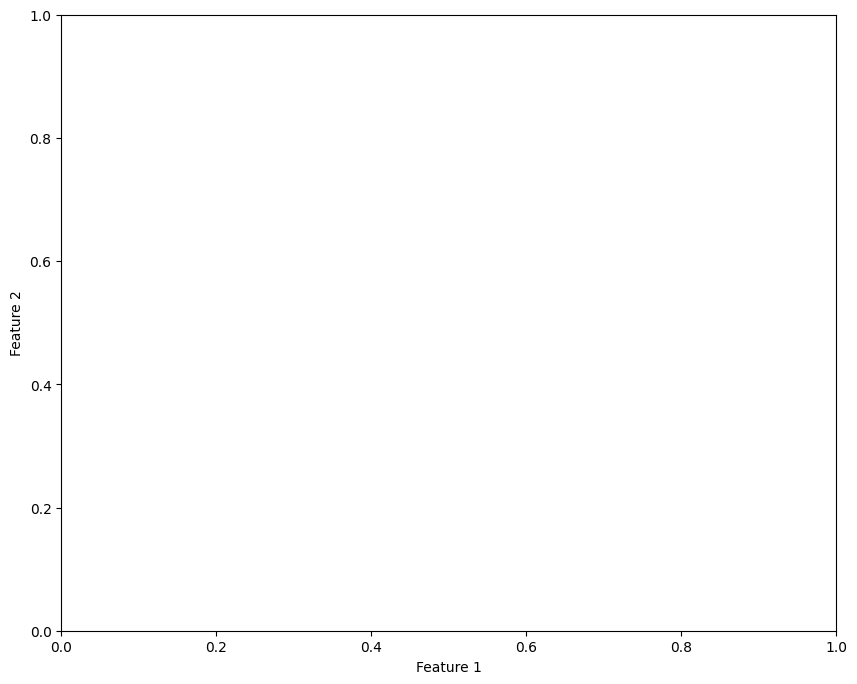

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv('results/input_cleaned.csv')

# Vectorize the content of the articles using the TF-IDF method
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])

# Cluster the articles using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Assign cluster labels to the DataFrame
df['cluster'] = dbscan.labels_

# Get the unique cluster labels
clusters = df['cluster'].unique()

# Set up the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

feature_names = vectorizer.get_feature_names_out()
print(feature_names)

# # Plot each article as a point colored by its cluster label
# for cluster in clusters:
#     if cluster == -1:
#         # Plot noise articles in black
#         color = 'k'
#     else:
#         # Plot clustered articles with a unique color
#         color = plt.cm.Set1(cluster / 10)
#     cluster_df = df[df['cluster'] == cluster]
#     feature_1_values = X[cluster_df.index.values, feature_names.index('feature_1')].toarray().flatten()
#     feature_2_values = X[cluster_df.index.values, feature_names.index('feature_2')].toarray().flatten()
#     ax.scatter(feature_1_values, feature_2_values, c=color, label=f'Cluster {cluster}')

# ax.legend()
# plt.show()